# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [1]:
print("Hello World!")


Hello World!


C:\Users\arkhi\AppData\Local\Temp\ipykernel_12988\305666399.py:18: RuntimeWarning: overflow encountered in scalar add
  avg = (img_arr[i][j][0] + img_arr[i][j][1] + img_arr[i][j][2]) // 3


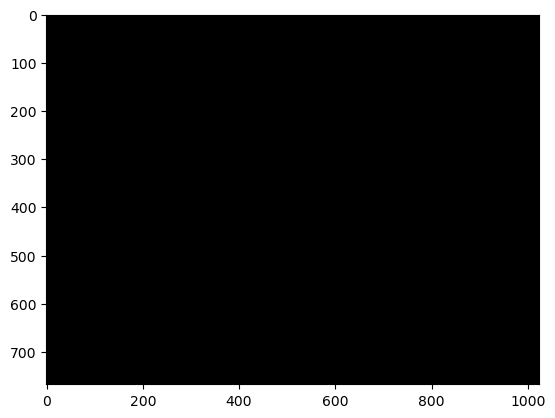

In [1]:
from xmlrpc.client import Binary
import datetime
import pandas as pd
import pickle

def send_back_binarization(bin_data, threshold):
    if not 1 <= threshold <= 255:
        raise ValueError("Порог должен быть в диапазоне 1-255")
    img_arr = pickle.loads(bin_data.data)
    height = img_arr.shape[0]
    width = img_arr.shape[1]
    channels = img_arr.shape[2] if len(img_arr.shape) > 2 else 1
    binarized_arr = [[[0 for _ in range(channels)] for _ in range(width)] for _ in range(height)]

    for i in range(height):
        for j in range(width):
            if channels == 3:
                avg = (img_arr[i][j][0] + img_arr[i][j][1] + img_arr[i][j][2]) // 3
                value = 255 if avg >= threshold else 0
                for c in range(3):
                    binarized_arr[i][j][c] = value
            elif channels == 1:
                value = 255 if img_arr[i][j][0] >= threshold else 0
                binarized_arr[i][j][0] = value

    pimg = pickle.dumps(binarized_arr)
    return Binary(pimg)

import matplotlib.pyplot as plt
from xmlrpc.client import ServerProxy, Binary
import pickle
import numpy as np

def make_bin(img_arr_in):
    pimg = pickle.dumps(img_arr_in)
    img_bin = Binary(pimg)

    img_bin2 = send_back_binarization(img_bin, 100)

    img_arr_out = pickle.loads(img_bin2.data)
    return img_arr_out

img_arr = plt.imread('LR1/Jellyfish.jpg')
img_arr_bin = make_bin(img_arr)

# Изображение с инверсией цвета
plt.imshow(img_arr_bin)
plt.show()

In [1]:
import matplotlib.pyplot as plt
from xmlrpc.client import ServerProxy, Binary
import pickle
import numpy as np

# Режим отображения внутри ноутбука
%matplotlib inline

# Создание прокси для подключения к серверу (предполагается, что сервер запущен на localhost:8008)
server = ServerProxy("http://localhost:8008")

# Функция для бинаризации через сервер
def make_bin(img_arr_in):
    # Нормализация значений из 0.0-1.0 в 0-255
    img_arr_normalized = (img_arr_in * 255).astype(np.uint8)
    pimg = pickle.dumps(img_arr_normalized)
    img_bin = Binary(pimg)

    print(f"Отправлено: shape={img_arr_normalized.shape}, min={img_arr_normalized.min()}, max={img_arr_normalized.max()}")  # Отладка
    img_bin2 = server.send_back_binarization(img_bin, 50)  # Вызов серверной функции
    img_arr_out = pickle.loads(img_bin2.data)
    print(f"Получено: shape={img_arr_out.shape}, min={img_arr_out.min()}, max={img_arr_out.max()}")  # Отладка
    return img_arr_out

# Загрузка изображения
try:
    img_arr = plt.imread('LR1/11.bmp')
    print(f"Исходное изображение: shape={img_arr.shape}, min={img_arr.min()}, max={img_arr.max()}, dtype={img_arr.dtype}")  # Отладка

    # Бинаризация
    img_arr_bin = make_bin(img_arr)

    # Отображение результата
    plt.imshow(img_arr_bin)
    plt.axis('off')
    plt.title('Бинаризованное изображение')
    plt.show()
except FileNotFoundError as e:
    print(f"Ошибка: Файл не найден - {e}")
except Exception as e:
    print(f"Ошибка: {e}")

Исходное изображение: shape=(780, 780, 4), min=0, max=255, dtype=uint8
Отправлено: shape=(780, 780, 4), min=0, max=255
Ошибка: <Fault 1: "<class 'NameError'>:name 'Image' is not defined">
